# Práctica Guiada de Laboratorio 5: Implementación del juego inteligente *Michi en Python* - Parte 1

## Curso "Inteligencia Artificial" Semestre 2022-1 - Grupo 1 - EAPIS

### Prof. Rolando A. Maguiña Pérez
### Junio 2022

## Introducción

Se desea implementar el juego llamado “Tres en línea” (Michi) en Python usando la herramienta llamada Jupyter Notebook. El programa a desarrollarse no solamente permitirá efectuar las jugadas del humano, sino que determinará las jugadas de la máquina mediante una estrategia adecuada. Asimismo, indicará la estrategia usada para efectuar dichos movimientos.

En este documento se presenta la construcción con Python de la interfaz del juego en consola.

## Plataforma de juego

La plataforma básica de un juego inteligente está formada por los sgtes componentes:
- Interfaz de juego
- Inicio de una partida (estado inicial) 
- Realización de jugadas (cjto de operadores)
- Verificación de la validez de un movimiento
- Verificación de condición de parada (test de parada)
- Estrategia de juego de la máquina
    - Estrategia aleatoria
    - Estrategia Primero el Mejor
    - Estrategia MiniMax
    - Estrategia MiniMax con poda alfa-beta

### Interfaz del juego

Tal como se anunció, la interfaz de juego se construirá a nivel de consola mediante el lenguaje computacional denominado Python. Los pasos a efectuar son:

- Los casilleros del tablero a usar en el Michi serán enumerados de la siguiente manera:

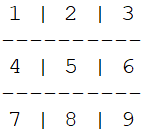

In [6]:
from IPython.display import Image
i = Image(filename='D:\\Cursos\\IA\\Python\\2021-1\\tablero_con_nros1.png')
i

- El tablero se representará como una lista formada por nueve números que describirán el contenido de cada posición. Un valor de 0 significa que la posición está vacía; un 1 significa que hay un círculo O, y un valor de 10 significa que hay un aspa X.  Asumiremos que el oponente juega con círculos O y la computadora con aspas X.

#### Función CREAR_TABLERO

- Definimos una función que llamaremos CREAR-TABLERO para crear un nuevo tablero.

In [74]:
#crea tablero nuevo
def crear_tablero():
    tablero=[0,0,0,0,0,0,0,0,0]
    return tablero

La llammos para comprobar su funcionamiento:

In [75]:
crear_tablero()

[0, 0, 0, 0, 0, 0, 0, 0, 0]

- Para imprimir el tablero definimos las funciones CONVERTIR_A_LETRAS, IMPRIMIR_FILA, e IMPRIMIR_TABLERO.

#### Función CONVERTIR_A_LETRAS

In [76]:
def convertir_a_letras(v):
    if (v == 1):
        return 'O'
    elif (v == 10):
        return 'X'
    elif (v == 0):
        return " "   

Esta función toma como parámetro un número *v*, el cual puede asumir los valores de 1 o 10. Convierte valores de 1 al caracter 'O' y de 10 a 'X'.

Llamamos a la función para comprobar su funcionamiento:

In [77]:
convertir_a_letras(1)

'O'

#### Función IMPRIMIR_FILA

In [78]:
def imprimir_fila(x ,y ,z):
     print("    {0}  |  {1}  |  {2} ".format(convertir_a_letras(x),convertir_a_letras(y),convertir_a_letras(z)))

- En *imprimir-fila()* se llama tres veces a la función *convertir-a-letras()*, pasándosele como parámetros *x*, *y* y *z*, c/u de las cuales puede asumir el valor de {" ", 1, 10}. 
Se vale de `print()` y de `format()` para imprimir el resultado.

Llamamos a la función para comprobar su funcionamiento:

In [79]:
imprimir_fila(0, 1, 10)

       |  O  |  X 


#### Función IMPRIMIR_TABLERO

Definimos la función para imprimir el tablero:

In [80]:
def imprimir_tablero(tablero):
    print("\n")
    imprimir_fila(tablero[0],tablero[1],tablero[2])
    print('   ----------------')
    imprimir_fila(tablero[3],tablero[4],tablero[5])
    print('   ----------------')
    imprimir_fila(tablero[6],tablero[7],tablero[8])
    print("\n")

Llamamos a la función para comprobar su funcionamiento:

In [81]:
imprimir_tablero([10, 0, 0, 0, 1, 0, 0, 10, 0])



    X  |     |    
   ----------------
       |  O  |    
   ----------------
       |  X  |    




En `imprimir-tablero()` se llama tres veces a la función `imprimir-fila()`, pasándosele como parámetros *tablero[i]* donde *i=[0,8]*. Se manda imprimir también líneas punteadas y en blanco.


### Jugadas 

- Definimos `efectuar_movimiento()` para marcar un aspa 'X' o un círculo 'O' en el tablero, según sea el caso. Recibe como parámetros *jugador*, la posición *pos* en la que se efectuará el movimiento y un tablero.

In [82]:
def efectuar_movimiento(jugador, pos, tablero):
    pos = pos
    tablero[pos-1] = jugador
    return tablero

Antes configuramos:

In [83]:
pc = 10
oponente = 1

Llamamos la función para comprobar su funcionamiento:

In [84]:
efectuar_movimiento(10, 7, [0, 0, 10, 0, 1, 0, 0, 0, 0])

[0, 0, 10, 0, 1, 0, 10, 0, 0]

En esta jugada ejm se ha marcado un aspa en la posición 7 del tablero actual; *jugador* es en este caso la computadora. Esto es equivalente a colocar un aspa  en dicha posición.

### Ejercicio 1

Efectuar varias jugadas tanto de la máquina como la del jugador humano, enseguida imprimir los tableros respectivos. Comente sus resultados.

### Solución 1

In [85]:
# Declaramos la función "movimiento" para automatizar los movimientos y poder hacer multiples jugadas.
def movimiento(x, tablero, jugada):
    # Se puede usar tambien el operador ternario:
    # [código si se cumple] if [condición] else [código si no se cumple], pero para una mayor facilidad se usara una condicional más simple.
    if jugada[0]:
        v = 1 # --> "o"
    else:
        v = 10 # --> "x"
    # Se usa la función "efectuar_movimiento()" para marcar un aspa 'X' o un círculo 'O' en el tablero.
    efectuar_movimiento(v, x, tablero)
    # Definimos la función para imprimir el tablero.
    imprimir_tablero(tablero)
    # Declaramos "juegada" como false, ya que recien se esta inicializando.
    jugada[0] = not jugada[0]

In [86]:
# Englobamos la función "crear_tablero()" en una variable tablero
tablero = crear_tablero()
# Inicializamos jugada como "True"
jugada = [True]

#### Movimiento 1:

In [87]:
title = "\nPrimer Movimiento"
print(title)
print("-"*len(title))
movimiento(1, tablero, jugada)


Primer Movimiento
------------------


    O  |     |    
   ----------------
       |     |    
   ----------------
       |     |    




#### Movimiento 2:

In [88]:
title = "\nSegundo Movimiento"
print(title)
print("-"*len(title))
movimiento(3, tablero, jugada)


Segundo Movimiento
-------------------


    O  |     |  X 
   ----------------
       |     |    
   ----------------
       |     |    




#### Movimiento 3:

In [89]:
title = "\n Tercer Movimiento"
print(title)
print("-"*len(title))
movimiento(7, tablero, jugada)


 Tercer Movimiento
-------------------


    O  |     |  X 
   ----------------
       |     |    
   ----------------
    O  |     |    




#### Movimiento 4:

In [90]:
title = "\n Cuarto Movimiento"
print(title)
print("-"*len(title))
movimiento(5, tablero, jugada)


 Cuarto Movimiento
-------------------


    O  |     |  X 
   ----------------
       |  X  |    
   ----------------
    O  |     |    




#### Movimiento 5:

In [91]:
title = "\n Quinto Movimiento"
print(title)
print("-"*len(title))
movimiento(4, tablero, jugada)


 Quinto Movimiento
-------------------


    O  |     |  X 
   ----------------
    O  |  X  |    
   ----------------
    O  |     |    




### Ejercicio 2

Optimizar el código presentado.

### Solución 2

In [96]:
"""
Automatización de Jugadas
. En este caso, solo se ha añadido 3 funciones que nos permitiran automatizar las jugadas que realicen
  los jugadores X y O. Cuando uno de los dos jugadores complete las tres aspas o circulos en una fila
  columna o diagonal, el juego se detendra y se dara por finalziado el juego.
"""
valores = [0]*8

# Función para sumar puntaje
def sumar_puntaje(valores, v, juega_player):
    punto = 1 if juega_player[0] else -1
    if v == 1:
        valores[0] += punto
        valores[3] += punto
        valores[6] += punto
    elif v == 2:
        valores[0] += punto
        valores[4] += punto
    elif v == 3:
        valores[0] += punto
        valores[5] += punto
        valores[7] += punto
    elif v == 4:
        valores[1] += punto
        valores[3] += punto
    elif v == 5:
        valores[1] += punto
        valores[4] += punto
        valores[6] += punto
        valores[7] += punto
    elif v == 6:
        valores[1] += punto
        valores[5] += punto
    elif v == 7:
        valores[3] += punto
        valores[2] += punto
    elif v == 8:
        valores[2] += punto
        valores[4] += punto
    elif v == 9:
        valores[2] += punto
        valores[5] += punto
        valores[6] += punto
    
# Función para verificar al ganador  
def verificar_ganador(valores):
    for i in valores:
        if i == 3 or i == -3:
            print("Gano {}".format("Aspa" if i == 3 else "Circulo")) #Terna
            return True
    return False
    
# Agregamos la validacion al movimiento para ver si es correcto
def move_and_print(x, tablero, juega_player, valores):
    if x < 0 and x > 9:
        print("Seleccione una casilla valida para jugar")
        return
    v = 1 if juega_player[0] else 10
    efectuar_movimiento(v, x, tablero)
    imprimir_tablero(tablero)
    juega_player[0] = not juega_player[0]
    ganador, sumar_puntaje(valores, x, juega_player)
    return verificar_ganador(valores)

In [97]:
jugar = True
tablero = crear_tablero()
juega_player = [True]
ganador = -1
title = "\nAutomatización de Jugadas"
print(title)
print("-"*len(title))
while jugar:
    x = int(input("Ingrese una casilla: "))
    jugar = not move_and_print(x, tablero, juega_player, valores)


Automatización de Jugadas
--------------------------


Ingrese una casilla:  2




       |  O  |    
   ----------------
       |     |    
   ----------------
       |     |    




Ingrese una casilla:  4




       |  O  |    
   ----------------
    X  |     |    
   ----------------
       |     |    




Ingrese una casilla:  8




       |  O  |    
   ----------------
    X  |     |    
   ----------------
       |  O  |    




Ingrese una casilla:  5




       |  O  |    
   ----------------
    X  |  X  |    
   ----------------
       |  O  |    




Ingrese una casilla:  3




       |  O  |  O 
   ----------------
    X  |  X  |    
   ----------------
       |  O  |    




Ingrese una casilla:  3




       |  O  |  X 
   ----------------
    X  |  X  |    
   ----------------
       |  O  |    




Ingrese una casilla:  1




    O  |  O  |  X 
   ----------------
    X  |  X  |    
   ----------------
       |  O  |    




Ingrese una casilla:  6




    O  |  O  |  X 
   ----------------
    X  |  X  |  X 
   ----------------
       |  O  |    


Gano Aspa


## Instrucciones para el envío de la solución

La solución de la "Práctica Guiada de Laboratorio 5 Parte 1 - IA 2022-1 G1 EAPIS" podrá enviarse como respuesta a la tarea del mismo nombre publicada en la clase de Classroom, hasta las 23:59 h del Miércoles 22 de Junio del 2022, en un archivo con extensión .ipynb.

El documento deberá tener las sgtes características:

Nombre del archivo: solPGL5-Parte1_IA_G1_nombre-apellidos.ipynb.

Todas las preguntas de la Práctica deben responderse en este mismo cuaderno computacional; la solución a cada pregunta debe registrarse en una celda debajo del plnteamiento de la misma, mencionando explícitamente como subtítulo: "Solución del ejercicio n", donde "n" corresponde al número del ejercicio.